In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
rp = PolynomialFeatures(degree=5) 

In [2]:
yes = pd.read_csv("Advertising.csv")
yes

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [4]:
A = yes.TV       
B = yes.Radio       
C = yes.Sales   

In [5]:
x = np.array([A,B]).T                 

pX = rp.fit_transform(x)    
rgr = LinearRegression()          
rgr.fit(pX,C)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

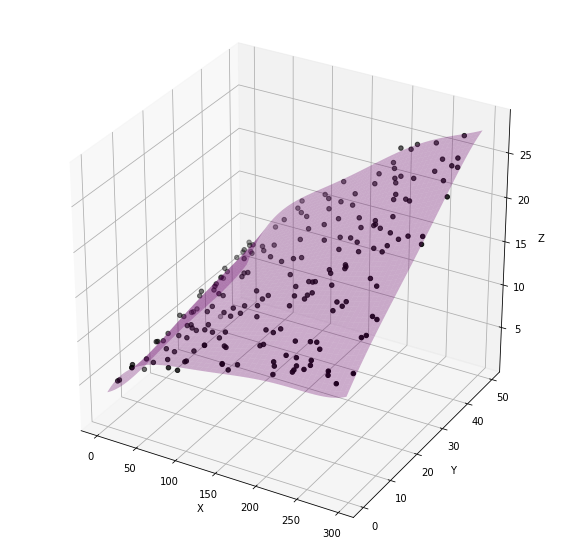

In [11]:
F = plt.figure(figsize = (10,10))  
ax = plt.axes(projection='3d')      
ax.set_xlabel("X")                   
ax.set_ylabel("Y")                   
ax.set_zlabel("Z")   

ax.scatter3D(A, B, C,c="black")     

px = np.linspace(A.min(),A.max(),200)   
py = np.linspace(B.min(),B.max(),200)
pz = np.zeros(40000).reshape(200,200) 

X, Y = np.meshgrid(px, py)
for i in range(200):                
  for k in range(200):               
    prd = rgr.predict(rp.fit_transform([[X[i][k], Y[i][k]]]))
    pz[i][k] = prd              

ax.plot_surface(X,Y,pz,color="purple",alpha=0.3)